# Exploratory Data Analysis

In [78]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/CSE_student_performances.csv')

In [79]:
df

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...
94,21,Male,Good,Yes,Sometimes,Yes,Yes,6,4.0,Yes
95,21,Female,Good,Yes,Yes,No,Yes,6,6.0,Yes
96,25,Male,Good,Yes,Sometimes,No,Yes,4,9.0,No
97,21,Male,Good,Yes,No,Sometimes,No,10,23.0,Yes


In [80]:
# Check for missing values
print(df.isnull().sum())

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64


In [81]:
# Replacing the missing values with mean
mean_value = df['NumberOfFriend'].mean()
df['NumberOfFriend'].fillna(mean_value, inplace=True)

In [82]:
print(df.isnull().sum())

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          0
LikeNewThings                           0
dtype: int64


In [83]:
print(df.describe(include='all'))

             Age  Gender AcademicPerformance TakingNoteInClass  \
count   99.000000     99                  99                99   
unique        NaN      2                   4                 3   
top           NaN   Male             Average               Yes   
freq          NaN     56                  45                61   
mean    22.515152    NaN                 NaN               NaN   
std      1.560767    NaN                 NaN               NaN   
min     20.000000    NaN                 NaN               NaN   
25%     21.000000    NaN                 NaN               NaN   
50%     23.000000    NaN                 NaN               NaN   
75%     24.000000    NaN                 NaN               NaN   
max     25.000000    NaN                 NaN               NaN   

       DepressionStatus FaceChallangesToCompleteAcademicTask LikePresentation  \
count                99                                   99               99   
unique                3                      

In [84]:
df.columns

Index(['Age ', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
       'DepressionStatus', 'FaceChallangesToCompleteAcademicTask',
       'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend',
       'LikeNewThings'],
      dtype='object')

In [85]:
# Remove any trailing spaces
df.columns = df.columns.str.strip()

In [86]:
df.columns

Index(['Age', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
       'DepressionStatus', 'FaceChallangesToCompleteAcademicTask',
       'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend',
       'LikeNewThings'],
      dtype='object')

# Visualizations

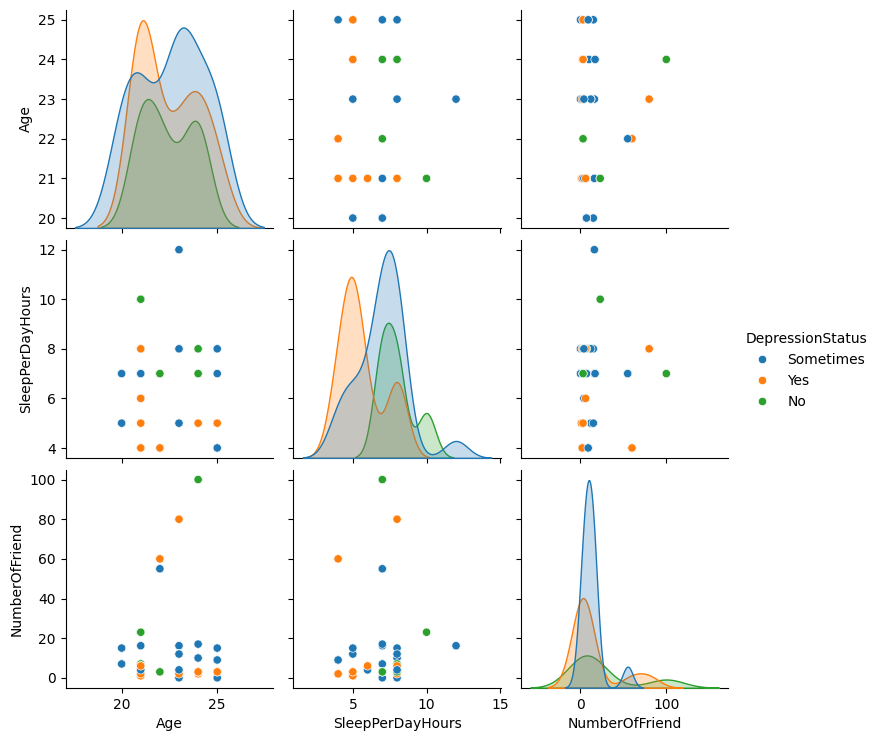

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to see relationships
sns.pairplot(df, hue='DepressionStatus')
plt.show()

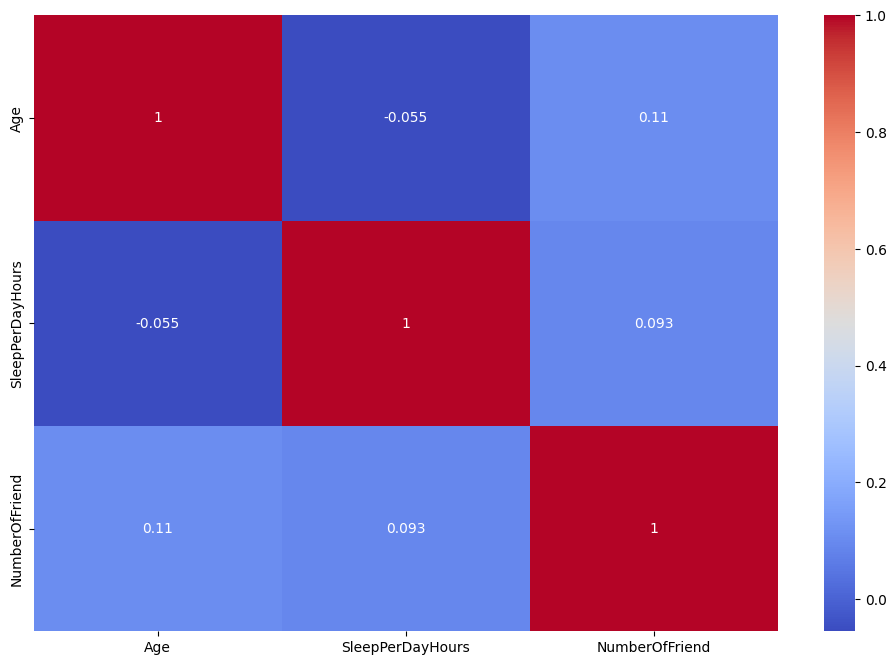

In [88]:
numeric_df = df.select_dtypes(include=[float, int])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

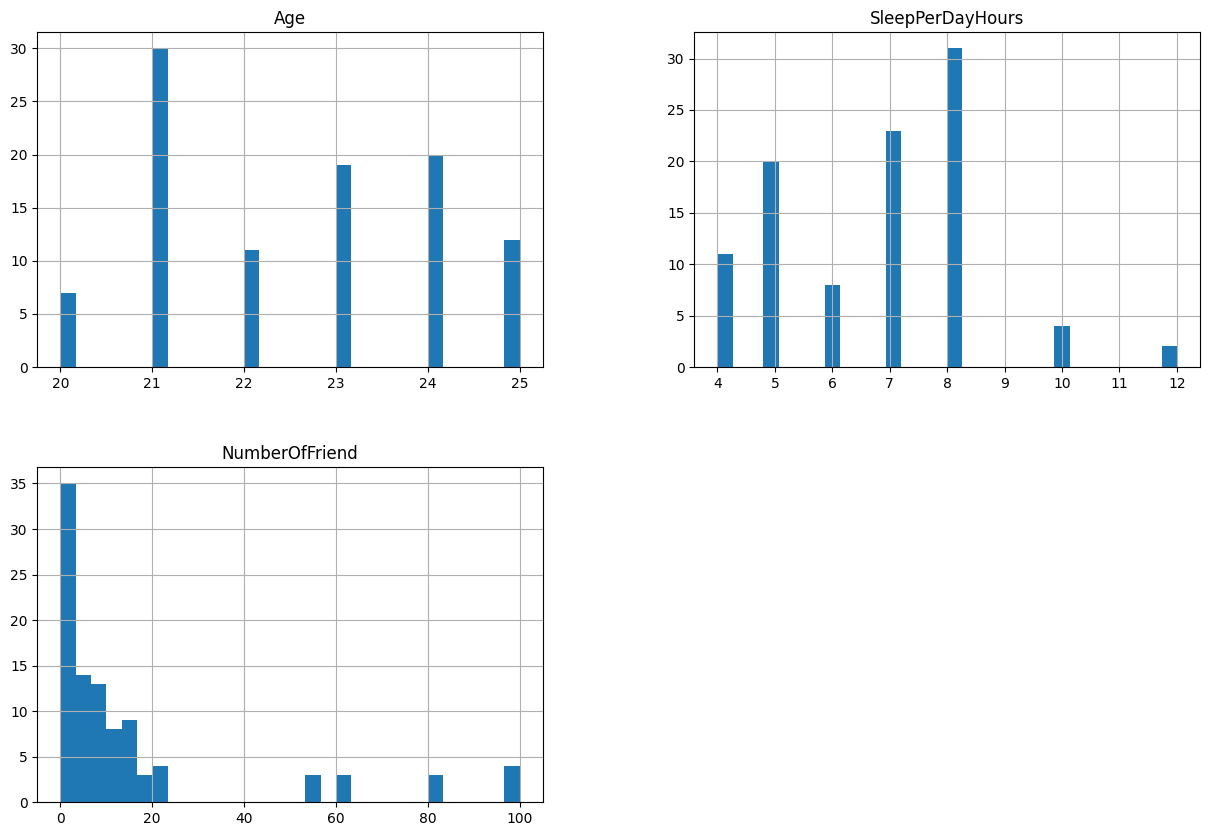

In [89]:
# Distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

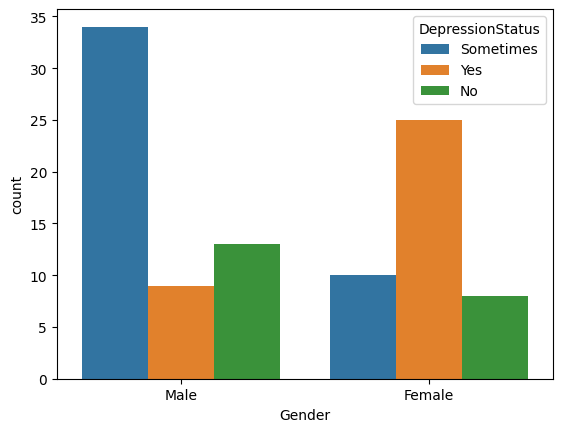

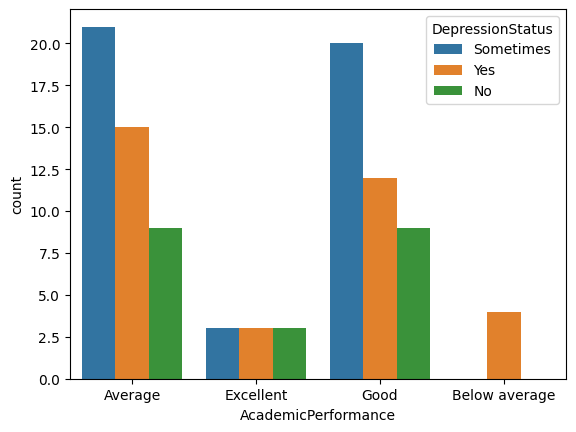

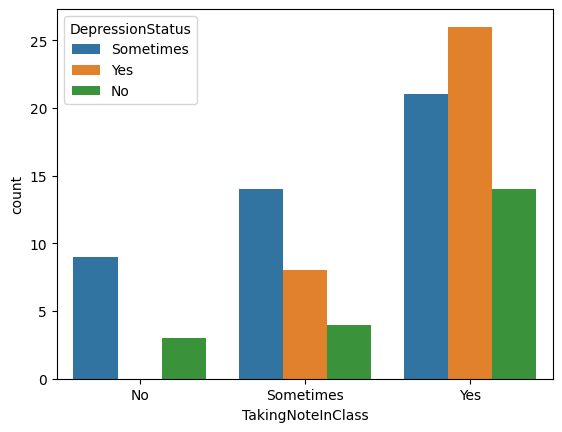

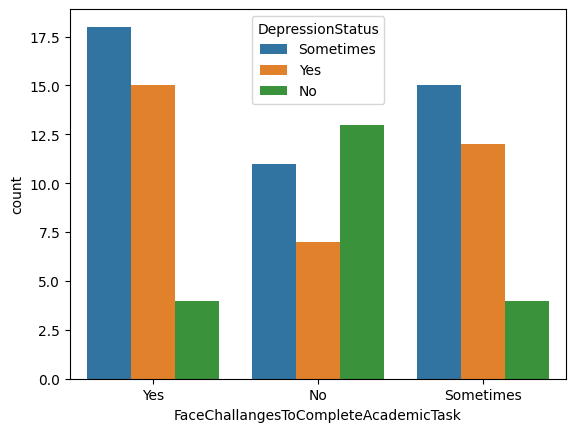

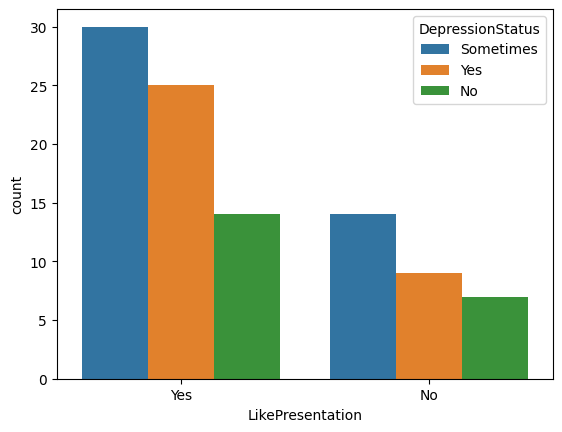

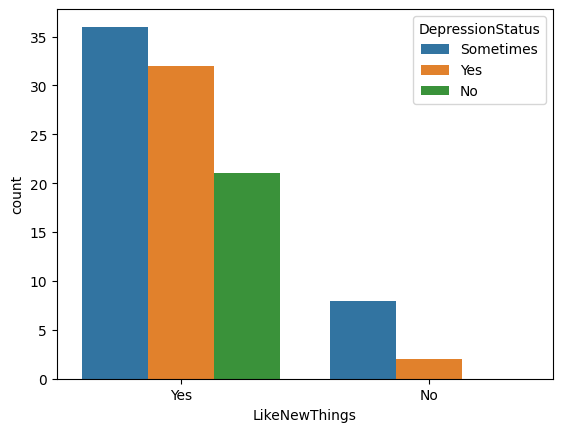

In [90]:
# Countplot for categorical features
categorical_features = ['Gender', 'AcademicPerformance', 'TakingNoteInClass', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'LikeNewThings']
for feature in categorical_features:
    sns.countplot(data=df, x=feature, hue='DepressionStatus')
    plt.show()

# Data Preprocessing

In [91]:
df.dtypes

Age                                       int64
Gender                                   object
AcademicPerformance                      object
TakingNoteInClass                        object
DepressionStatus                         object
FaceChallangesToCompleteAcademicTask     object
LikePresentation                         object
SleepPerDayHours                          int64
NumberOfFriend                          float64
LikeNewThings                            object
dtype: object

In [92]:
from sklearn.preprocessing import LabelEncoder

# categorical_features = ['Gender', 'AcademicPerformance', 'TakingNoteInClass', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'LikeNewThings']

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [93]:
df

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,1,0,0,1,2,1,12,16.189474,1
1,23,1,2,1,2,0,1,8,80.000000,1
2,24,1,0,0,1,1,0,8,10.000000,1
3,20,0,3,2,1,2,0,5,15.000000,1
4,24,0,0,2,2,2,1,5,2.000000,1
...,...,...,...,...,...,...,...,...,...,...
94,21,1,3,2,1,2,1,6,4.000000,1
95,21,0,3,2,2,0,1,6,6.000000,1
96,25,1,3,2,1,0,1,4,9.000000,0
97,21,1,3,2,0,1,0,10,23.000000,1


In [94]:
df.dtypes

Age                                       int64
Gender                                    int64
AcademicPerformance                       int64
TakingNoteInClass                         int64
DepressionStatus                          int64
FaceChallangesToCompleteAcademicTask      int64
LikePresentation                          int64
SleepPerDayHours                          int64
NumberOfFriend                          float64
LikeNewThings                             int64
dtype: object

In [95]:
print(df.columns)

Index(['Age', 'Gender', 'AcademicPerformance', 'TakingNoteInClass',
       'DepressionStatus', 'FaceChallangesToCompleteAcademicTask',
       'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend',
       'LikeNewThings'],
      dtype='object')


In [97]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'SleepPerDayHours', 'NumberOfFriend']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [98]:
df

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,0.312229,1,0,0,1,2,1,3.054773,0.000000,1
1,0.312229,1,2,1,2,0,1,0.741790,2.578397,1
2,0.956200,1,0,0,1,1,0,0.741790,-0.250099,1
3,-1.619686,0,3,2,1,2,0,-0.992947,-0.048063,1
4,0.956200,0,0,2,2,2,1,-0.992947,-0.573355,1
...,...,...,...,...,...,...,...,...,...,...
94,-0.975714,1,3,2,1,2,1,-0.414702,-0.492541,1
95,-0.975714,0,3,2,2,0,1,-0.414702,-0.411727,1
96,1.600171,1,3,2,1,0,1,-1.571193,-0.290506,0
97,-0.975714,1,3,2,0,1,0,1.898282,0.275193,1


# Feature Selection

In [99]:
# Get correlation of features with target variable
correlation = df.corr()
print(correlation['DepressionStatus'].sort_values(ascending=False))

DepressionStatus                        1.000000
FaceChallangesToCompleteAcademicTask    0.270032
TakingNoteInClass                       0.168054
LikePresentation                        0.058098
Age                                     0.002687
LikeNewThings                          -0.031381
AcademicPerformance                    -0.059008
NumberOfFriend                         -0.136550
Gender                                 -0.315345
SleepPerDayHours                       -0.504107
Name: DepressionStatus, dtype: float64


In [100]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest for feature importance
X = df.drop('DepressionStatus', axis=1)
y = df['DepressionStatus']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                      importance
NumberOfFriend                          0.311920
SleepPerDayHours                        0.184075
FaceChallangesToCompleteAcademicTask    0.116487
Age                                     0.109089
Gender                                  0.081323
AcademicPerformance                     0.067850
TakingNoteInClass                       0.056341
LikePresentation                        0.045344
LikeNewThings                           0.027571


# Model Selection and Training

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Train Multiple Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Logistic Regression trained.
Support Vector Machine trained.
Random Forest trained.
Gradient Boosting trained.


# Evaluation

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.85
[[2 1 0]
 [0 6 0]
 [1 1 9]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.85        20
   macro avg       0.81      0.83      0.81        20
weighted avg       0.88      0.85      0.85        20

Support Vector Machine Accuracy: 0.75
[[2 1 0]
 [0 6 0]
 [0 4 7]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.55      1.00      0.71         6
           2       1.00      0.64      0.78        11

    accuracy                           0.75        20
   macro avg       0.85      0.77      0.76        20
weighted avg       0.86      0.75      0.76        20

Random Forest Accuracy: 0.85
[[3 0 0]
 [0 6 0]
 [0 3 8]]
              precision    recall  f1-score   suppor

# Pipeline Implementation

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_features = ['Age', 'SleepPerDayHours', 'NumberOfFriend']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['Gender', 'AcademicPerformance', 'TakingNoteInClass', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'LikeNewThings']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Train the pipeline
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Pipeline Model Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Pipeline Model Accuracy: 0.85
[[3 0 0]
 [0 6 0]
 [0 3 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.85        20
   macro avg       0.89      0.91      0.88        20
weighted avg       0.90      0.85      0.85        20

